In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import statsmodels.api as sm

%matplotlib inline

C:\Users\LauraSantAnnaGualdaP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Importing datasets

In [2]:
dataPath = '../data/FINAL_DATA/'

## CGU Irregularities

In [3]:
data_cgu_all = pd.read_excel(dataPath+'dataset_CGU.xlsx')
len(data_cgu_all)

1223

In [4]:
data_cgu = data_cgu_all[data_cgu_all['not_audited_educ']==0].reset_index()
len(data_cgu)

1197

In [5]:
data_cgu['ind_corrup_EDUC_grave'].describe()

count    1197.000000
mean        0.423559
std         0.494329
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ind_corrup_EDUC_grave, dtype: float64

* Term 1: 2005-2008

In [6]:
data_cgu_t1 = data_cgu[data_cgu['Ano_Auditoria']<=2008]
list_mun_2007 = list(data_cgu_t1['cod_mun'].unique())
print(len(data_cgu_t1), len(list_mun_2007))

471 471


* Term 2: 2009-2012

In [7]:
data_cgu_t2 = data_cgu[data_cgu['Ano_Auditoria'].isin([2009,2010,2011,2012])]
list_mun_2011 = list(data_cgu_t2['cod_mun'].unique())
print(len(data_cgu_t2), len(list_mun_2011))

549 539


So... we have to do something about this: 10 municipalities have been audited twice in the same political term, in the beginning and in the end. We have chosen to keep the last audit results and insert a control for being audited before on that same term.

In [8]:
data_cgu_t2['control_2audit'] = np.where(data_cgu_t2['cod_mun'].duplicated(keep='first')==True, 1, 0)
data_cgu_t2_nodup = data_cgu_t2.drop_duplicates('cod_mun', keep='last').reset_index(drop=True)

C:\Users\LauraSantAnnaGualdaP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
list_mun_2011 = list(data_cgu_t2_nodup['cod_mun'].unique())
print(len(data_cgu_t2_nodup), len(list_mun_2011))

539 539


* Term 3: 2013-2015

In [10]:
data_cgu_t3 = data_cgu[data_cgu['Ano_Auditoria']>=2013]
list_mun_2015 = list(data_cgu_t3['cod_mun'].unique())
print(len(data_cgu_t3), len(list_mun_2015))

177 177


In [11]:
data_cgu_t1['control_2audit'] = 0
data_cgu_t3['control_2audit'] = 0

C:\Users\LauraSantAnnaGualdaP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LauraSantAnnaGualdaP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## School characteristics

In [12]:
data_school_2007 = pd.read_excel(dataPath+'dataset_2007_schoolAgg.xlsx')
data_school_2011 = pd.read_excel(dataPath+'dataset_2011_schoolAgg.xlsx')
data_school_2015 = pd.read_excel(dataPath+'dataset_2015_schoolAgg.xlsx')

In [13]:
data_school_2007 = data_school_2007.rename(index=str, columns={'ID_MUNICIPIO': 'cod_mun',
       'ANO': 'year', 'ID_ESCOLA':'id_school', 'MEDIA_PORT': 'port', 'MEDIA_MAT': 'mat', 
       'PORT_PAD': 'port_pad', 'MAT_PAD': 'mat_pad','NU_PARTICIPANTES': 'n_part', 
       'Aprovação no 5º Ano':'pass_5', 'Reprovação no 5º Ano': 'fail_5', 'Abandono no 5º Ano': 'leave_5',
       'Aprovação - Anos Iniciais (1º ao 5º Ano)': 'pass_ef1',
       'Reprovação - Anos Iniciais (1º ao 5º Ano)': 'fail_ef1',
       'Abandono - Anos Iniciais (1º ao 5º Ano)': 'leave_ef1', 
       'ID_LABORATORIO_INFORMATICA': 'ind_lab_pc', 
       'ID_LABORATORIO_CIENCIAS': 'ind_lab_cien',
       'ID_ESGOTO_INEXISTENTE': 'ind_esgoto_inex', 
       'ID_AGUA_INEXISTENTE': 'ind_agua_inex',
       'ID_SANIT': 'ind_sanit',
       'ind_qual_prof': 'ind_es_prof',                                                      
       'ind_election': 'ind_election_dir',
       'ind_train': 'ind_train_prof'})

In [14]:
data_school_2007 = data_school_2007[data_school_2007['cod_mun'].isin(list_mun_2007)].reset_index(drop=True)
len(data_school_2007)

1897

In [15]:
len(data_school_2007['cod_mun'].unique())

425

In [16]:
data_school_2011 = data_school_2011.rename(index=str, columns={'ID_MUNICIPIO': 'cod_mun',
       'ANO': 'year', 'ID_ESCOLA':'id_school', 'MEDIA_PORT': 'port', 'MEDIA_MAT': 'mat', 
       'PORT_PAD': 'port_pad', 'MAT_PAD': 'mat_pad','NU_PRESENTES': 'n_part', 
       'Aprovação no 5º Ano':'pass_5', 'Reprovação no 5º Ano': 'fail_5', 'Abandono no 5º Ano': 'leave_5',
       'Aprovação - Anos Iniciais (1º ao 5º Ano)': 'pass_ef1',
       'Reprovação - Anos Iniciais (1º ao 5º Ano)': 'fail_ef1',
       'Abandono - Anos Iniciais (1º ao 5º Ano)': 'leave_ef1', 
       'ID_LABORATORIO_INFORMATICA': 'ind_lab_pc', 
       'ID_LABORATORIO_CIENCIAS': 'ind_lab_cien',
       'ID_ESGOTO_INEXISTENTE': 'ind_esgoto_inex', 
       'ID_AGUA_INEXISTENTE': 'ind_agua_inex',
       'ID_SANIT': 'ind_sanit',
       'ind_qual_prof': 'ind_es_prof',                                                      
       'ind_election': 'ind_election_dir',
       'ind_train': 'ind_train_prof'})

In [17]:
data_school_2011 = data_school_2011[data_school_2011['cod_mun'].isin(list_mun_2011)].reset_index(drop=True)
len(data_school_2011)

2583

In [18]:
len(data_school_2011['cod_mun'].unique())

491

In [19]:
data_school_2015 = data_school_2015.rename(index=str, columns={'ID_MUNICIPIO': 'cod_mun',
       'ANO': 'year', 'ID_ESCOLA':'id_school', 'MEDIA_PORT': 'port', 'MEDIA_MAT': 'mat', 
       'PORT_PAD': 'port_pad', 'MAT_PAD': 'mat_pad','NU_PARTICIPANTES': 'n_part', 
       'Aprovação no 5º Ano':'pass_5', 'Reprovação no 5º Ano': 'fail_5', 'Abandono no 5º Ano': 'leave_5',
       'Aprovação - Anos Iniciais (1º ao 5º Ano)': 'pass_ef1',
       'Reprovação - Anos Iniciais (1º ao 5º Ano)': 'fail_ef1',
       'Abandono - Anos Iniciais (1º ao 5º Ano)': 'leave_ef1', 
       'IN_LABORATORIO_INFORMATICA': 'ind_lab_pc', 
       'IN_LABORATORIO_CIENCIAS': 'ind_lab_cien',
       'IN_ESGOTO_INEXISTENTE': 'ind_esgoto_inex', 
       'IN_AGUA_INEXISTENTE': 'ind_agua_inex',
       'IN_SANIT': 'ind_sanit',
       'ind_qual_prof': 'ind_es_prof',                                                      
       'ind_election': 'ind_election_dir',
       'ind_train': 'ind_train_prof'})

In [20]:
data_school_2015 = data_school_2015[data_school_2015['cod_mun'].isin(list_mun_2015)].reset_index(drop=True)
len(data_school_2015)

642

In [21]:
len(data_school_2015['cod_mun'].unique())

157

## Municipal characteristics

In [22]:
data_mun = pd.read_excel(dataPath+'dataset_munAgg.xlsx',sheet_name='real')
data_munic = pd.read_excel(dataPath+'dataset_munic.xlsx')

# Merging datasets, using school agg

In [23]:
result_2007_0 = pd.merge(data_school_2007, data_cgu_t1, on=['cod_mun'])
result_2007_1 = pd.merge(result_2007_0, data_mun, on=['cod_mun'])
result_2007 = pd.merge(result_2007_1, data_munic, on=['cod_mun'])
result_2007.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1897 entries, 0 to 1896
Columns: 138 entries, year to ind_parc_priv_2015
dtypes: float64(71), int64(42), object(25)
memory usage: 2.0+ MB


In [24]:
result_2011_0 = pd.merge(data_school_2011, data_cgu_t2_nodup, on=['cod_mun'])
result_2011_1 = pd.merge(result_2011_0, data_mun, on=['cod_mun'])
result_2011 = pd.merge(result_2011_1, data_munic, on=['cod_mun'])
result_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2583 entries, 0 to 2582
Columns: 142 entries, year to ind_parc_priv_2015
dtypes: float64(70), int32(1), int64(44), object(27)
memory usage: 2.8+ MB


In [25]:
result_2015_0 = pd.merge(data_school_2015, data_cgu_t3, on=['cod_mun'])
result_2015_1 = pd.merge(result_2015_0, data_mun, on=['cod_mun'])
result_2015 = pd.merge(result_2015_1, data_munic, on=['cod_mun'])
result_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 641
Columns: 142 entries, year to ind_parc_priv_2015
dtypes: float64(72), int64(44), object(26)
memory usage: 717.2+ KB


# Selecting useful columns

In [26]:
cols_2007 = ['cod_mun', 'year', 'id_school', 'port', 'mat', 'port_pad', 'mat_pad', 'n_part', 'pass_5',
       'pass_ef1', 'fail_5', 'fail_ef1', 'leave_5', 'leave_ef1', 'ind_male',
       'ind_white', 'ind_age_lesseq8', 'ind_age_9', 'ind_age_10', 'ind_age_11',
       'ind_age_moreeq12', 'ind_pc', 'ind_parents', 'ind_living',
       'ind_mother_hs', 'ind_father_hs', 'ind_election_dir', 'ind_train_prof',
       'ind_fin_dir', 'ind_pedag_dir', 'ind_prof_dir', 'ind_discip_dir',
       'ind_es_prof', 'ind_fin_prof', 'ind_pedag_prof', 'ind_prof_prof',
       'ind_discip_prof', 'ind_lab_pc', 'ind_lab_cien', 'ind_esgoto_inex',
       'ind_agua_inex', 'ind_sanit', #'ind_socioecon', 
       'prop_pop_urban_2010', 'gini_2010','pop_total_2010', 'pib_percap_2007', 'invest_2008', 'n_esc_mun_2007', 
       'ind_priv_2007', 'priv_fail_2007', 'priv_drop_2007',
       '2mandato_2005', 'sexo_2005', 'idade_2005', 'pref_ens_superior_2005', 'partido_2005',
       'ind_part_comun_2006', 'ind_campanha_2006', 'ind_lei_2006', 'ind_conselho_2006',
       'ind_pta_2006', 'ind_con_pub_2005', 'ind_parc_priv_2005',
       'Ed_Sorteio', 'Ano_Sorteio', 'Ano_Auditoria', 'audit_again', 'n_OS', 'n_irreg', 'irreg_Graves', 'irreg_Medias', 'irreg_Formais', 
       'not_audited_educ', 'n_OS_EDUC', 'n_irreg_EDUC', 'irreg_EDUC_Graves', 'irreg_EDUC_Medias', 'irreg_EDUC_Formais', 
       'n_corrup', 'ind_corrup', 'n_corrup_EDUC', 'ind_corrup_EDUC', 
       'n_corrup_EDUC_grave', 'ind_corrup_EDUC_grave', 
       'prop_corrup', 'prop_corrup_EDUC', 'prop_corrup_EDUC_grave', 
       'avg_corrup', 'avg_corrup_EDUC', 'avg_corrup_EDUC_grave', 'Id_Mun_Sort']

In [27]:
data_cgu.columns

Index(['index', 'cod_mun', 'audit_again', 'Id_Mun_Sort', 'Id_Mun_UF', 'UF',
       'Ed_Sorteio', 'Ano_Sorteio', 'Ano_Auditoria', 'n_OS', 'n_irreg',
       'irreg_Graves', 'irreg_Medias', 'irreg_Formais', 'not_audited_educ',
       'n_OS_EDUC', 'n_irreg_EDUC', 'irreg_EDUC_Graves', 'irreg_EDUC_Medias',
       'irreg_EDUC_Formais', 'n_corrup', 'ind_corrup', 'n_corrup_EDUC',
       'ind_corrup_EDUC', 'n_corrup_EDUC_grave', 'ind_corrup_EDUC_grave',
       'prop_corrup', 'prop_corrup_EDUC', 'prop_corrup_EDUC_grave',
       'avg_corrup', 'avg_corrup_EDUC', 'avg_corrup_EDUC_grave'],
      dtype='object')

In [28]:
data_2007  = result_2007[cols_2007]
data_2007.rename(columns={'pib_percap_2007': 'pib_percap', 'invest_2008': 'invest', 
                          'n_esc_mun_2007': 'n_esc_mun', '2mandato_2005' : 'term_pref_2', 
                          'sexo_2005' : 'sexo_pref', 'idade_2005': 'idade_pref', 
                          'pref_ens_superior_2005': 'pref_ens_superior', 'partido_2005': 'partido_pref', 
                          'ind_part_comun_2006': 'ind_part_comun', 'ind_campanha_2006': 'ind_campanha',
                          'ind_lei_2006': 'ind_lei', 'ind_conselho_2006': 'ind_conselho',
                          'ind_pta_2006': 'ind_pta','ind_con_pub_2005': 'ind_con_pub', 
                          'ind_parc_priv_2005': 'ind_parc_priv',
                          'ind_priv_2007' : 'ind_priv', 
                          'priv_fail_2007': 'priv_fail' , 
                          'priv_drop_2007': 'priv_drop'}, inplace=True)

C:\Users\LauraSantAnnaGualdaP\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [29]:
cols_2011 = ['cod_mun', 'year', 'id_school', 'port', 'mat', 'port_pad', 'mat_pad', 'n_part', 'pass_5',
       'pass_ef1', 'fail_5', 'fail_ef1', 'leave_5', 'leave_ef1', 'ind_male',
       'ind_white', 'ind_age_lesseq8', 'ind_age_9', 'ind_age_10', 'ind_age_11',
       'ind_age_moreeq12', 'ind_pc', 'ind_parents', 'ind_living',
       'ind_mother_hs', 'ind_father_hs', 'ind_election_dir', 'ind_train_prof',
       'ind_fin_dir', 'ind_pedag_dir', 'ind_prof_dir', 'ind_discip_dir',
       'ind_es_prof', 'ind_fin_prof', 'ind_pedag_prof', 'ind_prof_prof',
       'ind_discip_prof', 'ind_lab_pc', 'ind_lab_cien', 'ind_esgoto_inex',
       'ind_agua_inex', 'ind_sanit', #'ind_socioecon',
       'prop_pop_urban_2010', 'gini_2010', 'pop_total_2010', 'pib_percap_2011', 'invest_2011', 'n_esc_mun_2011',
       'ind_priv_2011', 'priv_fail_2011', 'priv_drop_2011',
       '2mandato_2009', 'sexo_2009', 'idade_2009', 'pref_ens_superior_2009', 'partido_2009', 
       'ind_part_comun_2009', 'ind_campanha_2009', 'ind_lei_2009', 'ind_conselho_2009',  
       'ind_pta_2009','ind_con_pub_2009', 'ind_parc_priv_2009',
       'Ed_Sorteio', 'Ano_Sorteio', 'Ano_Auditoria', 'audit_again', 'n_OS', 'n_irreg', 'irreg_Graves', 'irreg_Medias', 'irreg_Formais', 
       'not_audited_educ', 'n_OS_EDUC', 'n_irreg_EDUC', 'irreg_EDUC_Graves', 'irreg_EDUC_Medias', 'irreg_EDUC_Formais', 
       'n_corrup', 'ind_corrup', 'n_corrup_EDUC', 'ind_corrup_EDUC', 
       'n_corrup_EDUC_grave', 'ind_corrup_EDUC_grave', 
       'prop_corrup', 'prop_corrup_EDUC', 'prop_corrup_EDUC_grave', 
       'avg_corrup', 'avg_corrup_EDUC', 'avg_corrup_EDUC_grave', 'Id_Mun_Sort']

In [30]:
data_2011  = result_2011[cols_2011]
data_2011.rename(columns={'pib_percap_2011': 'pib_percap', 'invest_2011': 'invest', 
                          'n_esc_mun_2011': 'n_esc_mun', '2mandato_2009' : 'term_pref_2', 
                          'sexo_2009' : 'sexo_pref', 'idade_2009': 'idade_pref', 
                          'pref_ens_superior_2009': 'pref_ens_superior', 'partido_2009': 'partido_pref', 
                          'ind_part_comun_2009': 'ind_part_comun', 'ind_campanha_2009': 'ind_campanha',
                          'ind_lei_2009': 'ind_lei', 'ind_conselho_2009': 'ind_conselho',
                          'ind_pta_2009': 'ind_pta','ind_con_pub_2009': 'ind_con_pub', 
                          'ind_parc_priv_2009': 'ind_parc_priv',
                          'ind_priv_2011' : 'ind_priv', 
                          'priv_fail_2011': 'priv_fail' , 
                          'priv_drop_2011': 'priv_drop'}, inplace=True)

C:\Users\LauraSantAnnaGualdaP\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [31]:
cols_2015 = ['cod_mun', 'year', 'id_school', 'port', 'mat', 'port_pad', 'mat_pad', 'n_part', 'pass_5',
       'pass_ef1', 'fail_5', 'fail_ef1', 'leave_5', 'leave_ef1', 'ind_male',
       'ind_white', 'ind_age_lesseq8', 'ind_age_9', 'ind_age_10', 'ind_age_11',
       'ind_age_moreeq12', 'ind_pc', 'ind_parents', 'ind_living',
       'ind_mother_hs', 'ind_father_hs', 'ind_election_dir', 'ind_train_prof',
       'ind_fin_dir', 'ind_pedag_dir', 'ind_prof_dir', 'ind_discip_dir',
       'ind_es_prof', 'ind_fin_prof', 'ind_pedag_prof', 'ind_prof_prof',
       'ind_discip_prof', 'ind_lab_pc', 'ind_lab_cien', 'ind_esgoto_inex',
       'ind_agua_inex', 'ind_sanit', #'ind_socioecon',
       'prop_pop_urban_2010', 'gini_2010', 'pop_total_2010', 'pib_percap_2015', 'invest_2015', 'n_esc_mun_2015', 
       'ind_priv_2015', 'priv_fail_2015', 'priv_drop_2015',
       '2mandato_2013', 'sexo_2013', 'idade_2013', 'pref_ens_superior_2013', 'partido_2013', 
       'ind_part_comun_2014', 'ind_campanha_2014', 'ind_lei_2014', 'ind_conselho_2014',  
       'ind_pta_2014','ind_con_pub_2015', 'ind_parc_priv_2015',
       'Ed_Sorteio', 'Ano_Sorteio', 'Ano_Auditoria', 'audit_again', 'n_OS', 'n_irreg', 'irreg_Graves', 'irreg_Medias', 'irreg_Formais', 
       'not_audited_educ', 'n_OS_EDUC', 'n_irreg_EDUC', 'irreg_EDUC_Graves', 'irreg_EDUC_Medias', 'irreg_EDUC_Formais', 
       'n_corrup', 'ind_corrup', 'n_corrup_EDUC', 'ind_corrup_EDUC', 
       'n_corrup_EDUC_grave', 'ind_corrup_EDUC_grave', 
       'prop_corrup', 'prop_corrup_EDUC', 'prop_corrup_EDUC_grave', 
       'avg_corrup', 'avg_corrup_EDUC', 'avg_corrup_EDUC_grave', 'Id_Mun_Sort']

In [32]:
data_2015  = result_2015[cols_2015]
data_2015.rename(columns={'pib_percap_2015': 'pib_percap', 'invest_2015': 'invest', 
                          'n_esc_mun_2015': 'n_esc_mun', '2mandato_2013' : 'term_pref_2', 
                          'sexo_2013' : 'sexo_pref', 'idade_2013': 'idade_pref', 
                          'pref_ens_superior_2013': 'pref_ens_superior', 'partido_2013': 'partido_pref', 
                          'ind_part_comun_2014': 'ind_part_comun', 'ind_campanha_2014': 'ind_campanha',
                          'ind_lei_2014': 'ind_lei', 'ind_conselho_2014': 'ind_conselho',
                          'ind_pta_2014': 'ind_pta','ind_con_pub_2015': 'ind_con_pub', 
                          'ind_parc_priv_2015': 'ind_parc_priv',
                          'ind_priv_2015' : 'ind_priv', 
                          'priv_fail_2015': 'priv_fail' , 
                          'priv_drop_2015': 'priv_drop',}, inplace=True)

C:\Users\LauraSantAnnaGualdaP\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


# Concatenating in a unique dataset

In [33]:
frames = [data_2007, data_2011, data_2015]
data_all = pd.concat(frames)
data_all = data_all.reset_index(drop=True)
data_all = data_all.convert_objects(convert_numeric=True)
data_all.info()

C:\Users\LauraSantAnnaGualdaP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 91 columns):
cod_mun                   5122 non-null int64
year                      5122 non-null int64
id_school                 5122 non-null int64
port                      5088 non-null float64
mat                       5088 non-null float64
port_pad                  5088 non-null float64
mat_pad                   5088 non-null float64
n_part                    5122 non-null int64
pass_5                    5108 non-null float64
pass_ef1                  5120 non-null float64
fail_5                    5108 non-null float64
fail_ef1                  5120 non-null float64
leave_5                   5108 non-null float64
leave_ef1                 5120 non-null float64
ind_male                  5121 non-null float64
ind_white                 5122 non-null float64
ind_age_lesseq8           5122 non-null float64
ind_age_9                 5122 non-null float64
ind_age_10                5122 non-nu

In [34]:
data_all['invest'] = data_all['invest'].replace(0, np.nan)

# Just a few plots

In [35]:
plt.rcParams['figure.figsize'] = (11, 5)
palette = sns.color_palette("hls", 8)
sns.set_palette(palette)

## Indicator of corruption in Education

In [36]:
data_all['Corruption'] = np.where(data_all['ind_corrup_EDUC_grave']==1, 'yes', 'no')
data_all['Corruption'].describe()

count     5122
unique       2
top        yes
freq      2602
Name: Corruption, dtype: object

In [37]:
len(data_all['cod_mun'].unique())

1001

### Only classified as severe by CGU

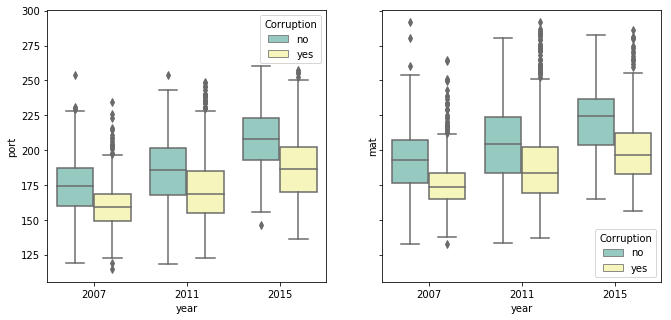

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(x='year', y='port', data=data_all, hue='Corruption', ax=ax1, palette="Set3")
sns.boxplot(x='year', y='mat', data=data_all, hue='Corruption', ax=ax2, palette="Set3")
plt.show()

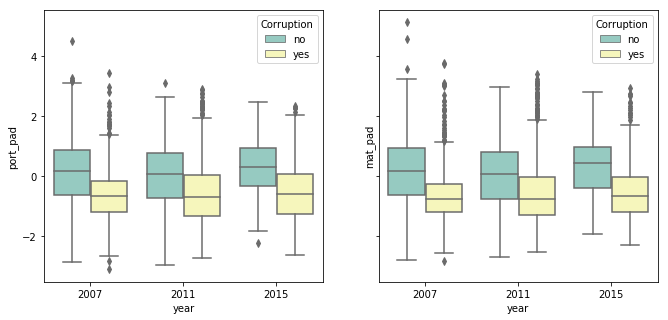

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(x='year', y='port_pad', data=data_all, hue='Corruption', ax=ax1, palette="Set3")
sns.boxplot(x='year', y='mat_pad', data=data_all, hue='Corruption', ax=ax2, palette="Set3")
plt.show()

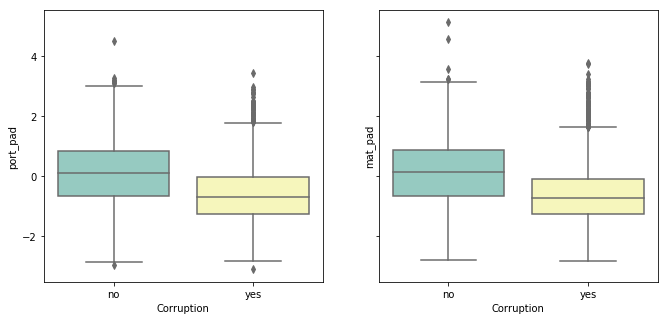

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(x='Corruption', y='port_pad', data=data_all, ax=ax1, palette="Set3")
sns.boxplot(x='Corruption', y='mat_pad', data=data_all, ax=ax2, palette="Set3")
plt.show()

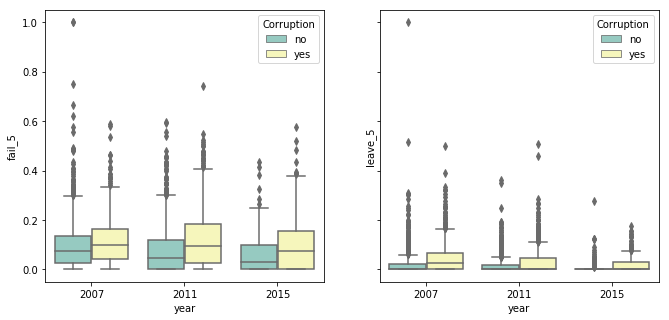

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(x='year', y='fail_5', data=data_all, hue='Corruption', ax=ax1, palette="Set3")
sns.boxplot(x='year', y='leave_5', data=data_all, hue='Corruption', ax=ax2, palette="Set3")
plt.show()

## Proportion of corruption

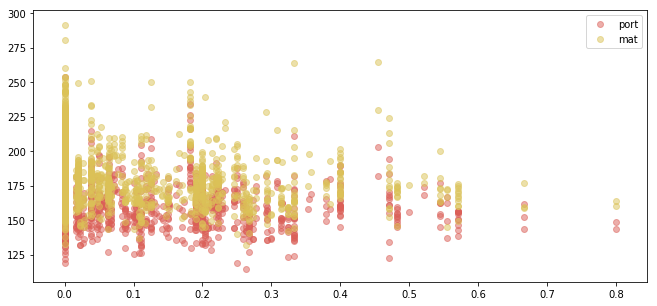

In [42]:
ax1 = plt.scatter(x='prop_corrup_EDUC_grave', y='port', data=data_all[data_all.year==2007], alpha=0.5, label='port')
ax2 = plt.scatter(x='prop_corrup_EDUC_grave', y='mat', data=data_all[data_all.year==2007], alpha=0.5, label='mat')
plt.legend(loc=1)

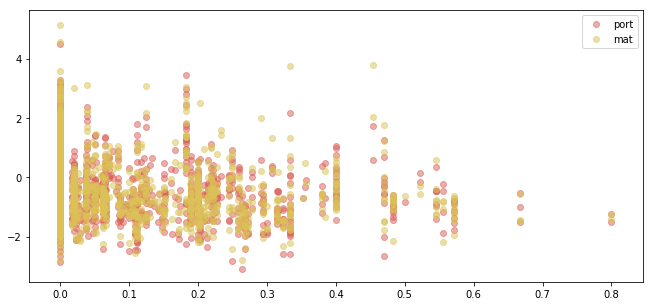

In [43]:
ax1 = plt.scatter(x='prop_corrup_EDUC_grave', y='port_pad', data=data_all[data_all.year==2007], alpha=0.5, label='port')
ax2 = plt.scatter(x='prop_corrup_EDUC_grave', y='mat_pad', data=data_all[data_all.year==2007], alpha=0.5, label='mat')
plt.legend(loc=1)

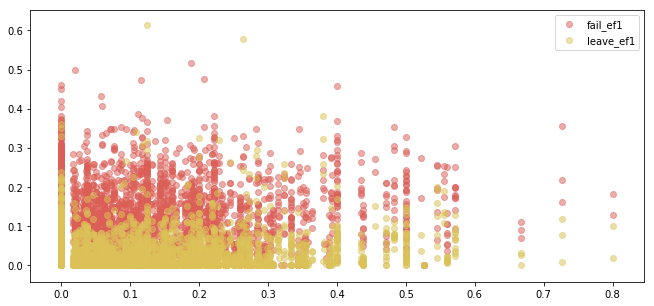

In [44]:
ax1 = plt.scatter(x='prop_corrup_EDUC_grave', y='fail_ef1', data=data_all, alpha=0.5, label='fail_ef1')
ax2 = plt.scatter(x='prop_corrup_EDUC_grave', y='leave_ef1', data=data_all, alpha=0.5, label='leave_ef1')
plt.legend(loc=1)

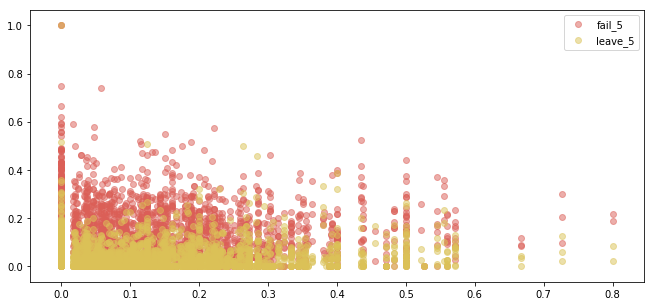

In [45]:
ax1 = plt.scatter(x='prop_corrup_EDUC_grave', y='fail_5', data=data_all, alpha=0.5, label='fail_5')
ax2 = plt.scatter(x='prop_corrup_EDUC_grave', y='leave_5', data=data_all, alpha=0.5, label='leave_5')
plt.legend(loc=1)

# Models, finally

In [95]:
cols_model = ['Intercept', 'C(year)[T.2011]', 'C(year)[T.2015]', 'ind_corrup_EDUC_grave', 'ind_male', 
              'ind_white', 'ind_mother_hs', 'ind_father_hs', 'ind_parents',
              'ind_living','ind_pc', 'ind_age_9','ind_age_10', 'ind_age_11', 'ind_age_moreeq12',
              'ind_election_dir','ind_train_prof', 'ind_fin_dir', 'ind_pedag_dir', 'ind_prof_dir',
              'ind_lab_pc', 'ind_lab_cien', 'ind_sanit', 'prop_pop_urban_2010','gini_2010',
              'np.log(pop_total_2010)', 'term_pref_2','np.log(pib_percap)', 'np.log(invest)', 'audit_again']

cols_right = ['ind_corrup_EDUC_grave', 'C(year)[T.2011]', 'C(year)[T.2015]', 'ind_male', 
              'ind_white', 'ind_mother_hs', 'ind_father_hs', 'ind_parents',
              'ind_living','ind_pc', 'ind_age_9','ind_age_10', 'ind_age_11', 'ind_age_moreeq12',
              'ind_election_dir','ind_train_prof', 'ind_fin_dir', 'ind_pedag_dir', 'ind_prof_dir',
              'ind_lab_pc', 'ind_lab_cien', 'ind_sanit', 'prop_pop_urban_2010','gini_2010', 
              'np.log(pop_total_2010)', 'term_pref_2', 'np.log(pib_percap)', 'np.log(invest)', 'audit_again']

## X = Ind_corrup + school + mun

###  Y = Mat

In [47]:
model_mat_ind_mun = smf.ols('mat_pad ~ ind_corrup_EDUC_grave + ind_male + ind_white + ind_mother_hs + ind_father_hs + ind_parents \
                        + ind_living  + ind_pc + ind_age_9 + ind_age_10 + ind_age_11 + ind_age_moreeq12\
                        + ind_election_dir + ind_train_prof + ind_fin_dir + ind_pedag_dir + ind_prof_dir\
                        + ind_lab_pc + ind_lab_cien + ind_sanit\
                        + prop_pop_urban_2010 + gini_2010 + np.log(pop_total_2010) + term_pref_2 \
                        + np.log(pib_percap) + np.log(invest) + C(year) + audit_again', data=data_all).fit()
model_mat_ind_mun = model_mat_ind_mun.get_robustcov_results()
print(model_mat_ind_mun.summary())

                            OLS Regression Results                            
Dep. Variable:                mat_pad   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     180.6
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        09:41:28   Log-Likelihood:                -5295.2
No. Observations:                4670   AIC:                         1.065e+04
Df Residuals:                    4640   BIC:                         1.084e+04
Df Model:                          29                                         
Covariance Type:                  HC1                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3

In [48]:
df_mat = pd.DataFrame(model_mat_ind_mun.model.exog, columns=cols_model)
df_mat = df_mat[cols_right]
inv_cov_mat = np.linalg.inv(np.cov(df_mat, rowvar=False))
termo_mat = inv_cov_mat[0][0]
var_corrup_mat = df_mat['ind_corrup_EDUC_grave'].var()
print('var ind_corrup: ',var_corrup_mat, ' term on matrix: ', termo_mat)

var ind_corrup:  0.25003698823576476  term on matrix:  5.3444757158


In [49]:
len(df_mat[df_mat['ind_corrup_EDUC_grave']==1])/len(df_mat)

0.49593147751606

###  Y = Port

In [50]:
model_port_ind_mun = smf.ols('port_pad ~ ind_corrup_EDUC_grave + ind_male + ind_white + ind_mother_hs + ind_father_hs + ind_parents \
                        + ind_living  + ind_pc + ind_age_9 + ind_age_10 + ind_age_11 + ind_age_moreeq12\
                        + ind_election_dir + ind_train_prof + ind_fin_dir + ind_pedag_dir + ind_prof_dir\
                        + ind_lab_pc + ind_lab_cien + ind_sanit\
                        + prop_pop_urban_2010 + gini_2010 + np.log(pop_total_2010) + term_pref_2 \
                        + np.log(pib_percap) + np.log(invest)+ C(year) + audit_again', data=data_all).fit()
model_port_ind_mun = model_port_ind_mun.get_robustcov_results()
print(model_port_ind_mun.summary())

                            OLS Regression Results                            
Dep. Variable:               port_pad   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        09:41:29   Log-Likelihood:                -5021.9
No. Observations:                4670   AIC:                         1.010e+04
Df Residuals:                    4640   BIC:                         1.030e+04
Df Model:                          29                                         
Covariance Type:                  HC1                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3

In [51]:
df_port = pd.DataFrame(model_port_ind_mun.model.exog, columns=cols_model)
df_port = df_port[cols_right]
inv_cov_port = np.linalg.inv(np.cov(df_port, rowvar=False))
termo_port = inv_cov_port[0][0]
var_corrup_port = df_port['ind_corrup_EDUC_grave'].var()
print('var ind_corrup: ',var_corrup_port, ' term on matrix: ', termo_port)3

var ind_corrup:  0.25003698823576476  term on matrix:  5.3444757158


### Selecting exact same data for failure and dropout

In [92]:
cols_model = ['mat_pad', 'ind_corrup_EDUC_grave','ind_male', 'ind_white', 'ind_mother_hs', 'ind_father_hs',
         'ind_parents', 'ind_living'  , 'ind_pc' , 'ind_age_9' , 'ind_age_10' , 'ind_age_11' , 'ind_age_moreeq12',
         'ind_election_dir' , 'ind_train_prof' , 'ind_fin_dir' , 'ind_pedag_dir' , 'ind_prof_dir', 'ind_lab_pc' ,
         'ind_lab_cien' , 'ind_sanit', 'prop_pop_urban_2010' , 'gini_2010' , 'pop_total_2010', 'term_pref_2',
         'pib_percap' , 'invest' , 'year' , 'audit_again']
list_index = list(data_all[teste].dropna(axis=0, how='any').index)

data_index = data_all.reset_index()
data_tables = data_index[data_index['index'].isin(list_index)]

###  Y = Fail (5th year)

In [96]:
model_fail_ind_mun = smf.ols('fail_5 ~ ind_corrup_EDUC_grave + ind_male + ind_white + ind_mother_hs + ind_father_hs + ind_parents \
                        + ind_living  + ind_pc + ind_age_9 + ind_age_10 + ind_age_11 + ind_age_moreeq12\
                        + ind_election_dir + ind_train_prof + ind_fin_dir + ind_pedag_dir + ind_prof_dir\
                        + ind_lab_pc + ind_lab_cien + ind_sanit\
                        + prop_pop_urban_2010 + gini_2010 + np.log(pop_total_2010) + term_pref_2\
                        + np.log(pib_percap) + np.log(invest)+ C(year) + audit_again', data=data_tables).fit()
model_fail_ind_mun = model_fail_ind_mun.get_robustcov_results()
print(model_fail_ind_mun.summary())

                            OLS Regression Results                            
Dep. Variable:                 fail_5   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     33.39
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          7.20e-167
Time:                        10:28:11   Log-Likelihood:                 4515.3
No. Observations:                4657   AIC:                            -8971.
Df Residuals:                    4627   BIC:                            -8777.
Df Model:                          29                                         
Covariance Type:                  HC1                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [97]:
df_fail = pd.DataFrame(model_fail_ind_mun.model.exog, columns=cols_model)
df_fail = df_fail[cols_right]
inv_cov_fail = np.linalg.inv(np.cov(df_fail, rowvar=False))
termo_fail = inv_cov_fail[0][0]
var_corrup_fail = df_fail['ind_corrup_EDUC_grave'].var()
print('var ind_corrup: ',var_corrup_fail, ' term on matrix: ', termo_fail)

var ind_corrup:  0.25004113823405355  term on matrix:  5.35155231823


###  Y = Dropout (5th year)

In [98]:
model_drop_ind_mun = smf.ols('leave_5 ~ ind_corrup_EDUC_grave + ind_male + ind_white + ind_mother_hs + ind_father_hs + ind_parents \
                        + ind_living  + ind_pc + ind_age_9 + ind_age_10 + ind_age_11 + ind_age_moreeq12\
                        + ind_election_dir + ind_train_prof + ind_fin_dir + ind_pedag_dir + ind_prof_dir\
                        + ind_lab_pc + ind_lab_cien + ind_sanit\
                        + prop_pop_urban_2010 + gini_2010 + np.log(pop_total_2010) + term_pref_2\
                        + np.log(pib_percap) + np.log(invest)+ C(year) + audit_again', data=data_tables).fit()
model_drop_ind_mun = model_drop_ind_mun.get_robustcov_results()
print(model_drop_ind_mun.summary())

                            OLS Regression Results                            
Dep. Variable:                leave_5   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     34.36
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          9.46e-172
Time:                        10:28:32   Log-Likelihood:                 8358.0
No. Observations:                4657   AIC:                        -1.666e+04
Df Residuals:                    4627   BIC:                        -1.646e+04
Df Model:                          29                                         
Covariance Type:                  HC1                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [99]:
df_drop = pd.DataFrame(model_drop_ind_mun.model.exog, columns=cols_model)
df_drop = df_drop[cols_right]
inv_cov_drop = np.linalg.inv(np.cov(df_drop, rowvar=False))
termo_drop = inv_cov_drop[0][0]
var_corrup_drop = df_drop['ind_corrup_EDUC_grave'].var()
print('var ind_corrup: ',var_corrup_drop, ' term on matrix: ', termo_drop)

var ind_corrup:  0.25004113823405355  term on matrix:  5.35155231823


## Summary Tables

In [70]:
cols_model = ['mat_pad', 'ind_corrup_EDUC_grave','ind_male', 'ind_white', 'ind_mother_hs', 'ind_father_hs',
         'ind_parents', 'ind_living'  , 'ind_pc' , 'ind_age_9' , 'ind_age_10' , 'ind_age_11' , 'ind_age_moreeq12',
         'ind_election_dir' , 'ind_train_prof' , 'ind_fin_dir' , 'ind_pedag_dir' , 'ind_prof_dir', 'ind_lab_pc' ,
         'ind_lab_cien' , 'ind_sanit', 'prop_pop_urban_2010' , 'gini_2010' , 'pop_total_2010', 'term_pref_2',
         'pib_percap' , 'invest' , 'year' , 'audit_again']
list_index = list(data_all[teste].dropna(axis=0, how='any').index)

In [84]:
data_index = data_all.reset_index()
data_tables = data_index[data_index['index'].isin(list_index)]

In [85]:
cols_school = ['port', 'mat', 'port_pad', 'mat_pad', 'n_part', 'pass_5', 'fail_5', 'leave_5',
        'ind_male', 'ind_white', 'ind_age_lesseq8', 'ind_age_9', 'ind_age_10', 'ind_age_11', 'ind_age_moreeq12',
        'ind_pc', 'ind_parents', 'ind_living','ind_mother_hs', 'ind_father_hs', 
        'ind_election_dir', 'ind_train_prof','ind_fin_dir', 'ind_pedag_dir', 'ind_prof_dir', 'ind_discip_dir',
        'ind_es_prof', 'ind_fin_prof', 'ind_pedag_prof', 'ind_prof_prof', 'ind_discip_prof', 
        'ind_lab_pc', 'ind_lab_cien', 'ind_sanit']

In [86]:
print(np.round(data_tables[cols_school].describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   count &    mean &    std &     min &     max \\
\midrule
port             &  4670.0 &  176.82 &  23.61 &  114.38 &  260.64 \\
mat              &  4670.0 &  194.30 &  26.40 &  132.30 &  291.68 \\
port\_pad         &  4670.0 &   -0.22 &   1.04 &   -3.10 &    4.50 \\
mat\_pad          &  4670.0 &   -0.19 &   1.06 &   -2.80 &    5.13 \\
n\_part           &  4670.0 &   52.62 &  34.22 &    5.00 &  318.00 \\
pass\_5           &  4657.0 &    0.88 &   0.12 &    0.00 &    1.00 \\
fail\_5           &  4657.0 &    0.10 &   0.10 &    0.00 &    1.00 \\
leave\_5          &  4657.0 &    0.02 &   0.05 &    0.00 &    1.00 \\
ind\_male         &  4670.0 &    0.51 &   0.10 &    0.00 &    1.00 \\
ind\_white        &  4670.0 &    0.28 &   0.16 &    0.00 &    1.00 \\
ind\_age\_lesseq8  &  4670.0 &    0.00 &   0.01 &    0.00 &    0.28 \\
ind\_age\_9        &  4670.0 &    0.04 &   0.06 &    0.00 &    0.48 \\
ind\_age\_10       &  4670.0 &    0.38 &   0.18 &    0.00 &    

In [88]:
cols_mun = ['Id_Mun_Sort', 'year','prop_pop_urban_2010', 'pop_total_2010', 
            'gini_2010', 'pib_percap', 'invest', 'n_esc_mun',
            'ind_priv', 'priv_fail', 'priv_drop',
            'term_pref_2', 'sexo_pref', 'pref_ens_superior', 
            'ind_part_comun', 'ind_campanha', 'ind_lei', 'ind_conselho',  
            'ind_pta','ind_con_pub', 'ind_parc_priv',
            'audit_again', 'n_irreg', 'irreg_Graves', 'irreg_Medias', 'irreg_Formais',
            'n_OS_EDUC', 'n_irreg_EDUC', 'irreg_EDUC_Graves',
            'n_corrup_EDUC_grave','ind_corrup_EDUC_grave']

In [89]:
data_tables_mun = data_tables[cols_mun].drop_duplicates(subset=['Id_Mun_Sort'], keep='first')

In [90]:
print(np.round(data_tables_mun[cols_mun].describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   count &      mean &       std &      min &        max \\
\midrule
year                  &  1036.0 &   2010.01 &      2.78 &  2007.00 &    2015.00 \\
prop\_pop\_urban\_2010   &  1036.0 &      0.65 &      0.21 &     0.09 &       1.00 \\
pop\_total\_2010        &  1036.0 &  25338.02 &  47325.75 &   805.00 &  571149.00 \\
gini\_2010             &  1036.0 &      0.51 &      0.06 &     0.33 &       0.78 \\
pib\_percap            &  1036.0 &  15947.53 &  23218.92 &  2396.24 &  513134.20 \\
invest                &  1036.0 &   5178.70 &   2371.17 &  1298.59 &   37045.79 \\
n\_esc\_mun             &  1036.0 &     22.58 &     27.78 &     1.00 &     222.00 \\
ind\_priv              &  1036.0 &      0.47 &      0.50 &     0.00 &       1.00 \\
priv\_fail             &   492.0 &      0.02 &      0.04 &     0.00 &       0.38 \\
priv\_drop             &   522.0 &      0.02 &      0.06 &     0.00 &       1.00 \\
term\_pref\_2           &  1036.0 &      0.36 &     

## Private Schools

In [61]:
model_fail_priv = smf.ols('priv_fail ~ ind_corrup_EDUC_grave + ind_priv*ind_corrup_EDUC_grave + prop_pop_urban_2010 + gini_2010 + np.log(pop_total_2010) \
                        + np.log(pib_percap) + np.log(invest)+ C(year) + audit_again + term_pref_2', data=data_all_mun).fit()
model_fail_priv = model_fail_priv.get_robustcov_results()
print(model_fail_priv.summary())

                            OLS Regression Results                            
Dep. Variable:              priv_fail   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                     15.50
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           8.71e-28
Time:                        14:01:53   Log-Likelihood:                 931.06
No. Observations:                 493   AIC:                            -1840.
Df Residuals:                     482   BIC:                            -1794.
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [62]:
model_fail_priv = smf.ols('priv_drop ~ ind_corrup_EDUC_grave + ind_priv*ind_corrup_EDUC_grave + prop_pop_urban_2010 + gini_2010 + np.log(pop_total_2010) \
                        + np.log(pib_percap) + np.log(invest)+ C(year) + audit_again + term_pref_2', data=data_all_mun).fit()
model_fail_priv = model_fail_priv.get_robustcov_results()
print(model_fail_priv.summary())

                            OLS Regression Results                            
Dep. Variable:              priv_drop   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.597
Date:                Thu, 15 Mar 2018   Prob (F-statistic):             0.0886
Time:                        14:01:53   Log-Likelihood:                 783.81
No. Observations:                 523   AIC:                            -1542.
Df Residuals:                     510   BIC:                            -1486.
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [63]:
cols_priv_m = ['Intercept', 'C(year)[T.2011]', 'C(year)[T.2015]', 'ind_corrup_EDUC_grave','ind_priv',
               'ind_priv:ind_corrup_EDUC_grave','prop_pop_urban_2010','gini_2010', 'np.log(pop_total_2010)', 
               'np.log(pib_percap)', 'np.log(invest)', 'audit_again', 'term_pref_2']

cols_priv = ['ind_corrup_EDUC_grave', 'C(year)[T.2011]', 'C(year)[T.2015]','ind_priv', 
               'ind_priv:ind_corrup_EDUC_grave','prop_pop_urban_2010','gini_2010', 'np.log(pop_total_2010)', 
               'np.log(pib_percap)', 'np.log(invest)', 'audit_again', 'term_pref_2']

In [64]:
df_priv = pd.DataFrame(model_fail_priv.model.exog, columns=cols_priv_m)
df_priv = df_priv[cols_priv]
inv_cov_priv = np.linalg.inv(np.cov(df_priv, rowvar=False))
termo_priv = inv_cov_priv[0][0]
var_corrup_priv = df_priv['ind_corrup_EDUC_grave'].var()
print('var ind_corrup: ',var_corrup_priv, ' term on matrix: ', termo_priv)

var ind_corrup:  0.24959890991406622  term on matrix:  74.516442587
